#Q1.

###Q1-->Part 1

In [2]:
from sklearn import linear_model
import pandas as pd
from sklearn.metrics import mean_absolute_error

df = pd.read_excel('slr06.xls')
# print(df)

#  set X  and  y seperately
X_data = df[['X']]
y_data = df['Y']

# calculating the number of rows for the diving in training, validation,test
per_60 = int(len(X_data)*(60/100))
per_val_20= int(len(X_data)*(80/100))
per_test_20 = int(len(X_data))



#  training sets 
X_train = X_data[:per_60]
y_train = y_data[:per_60]
print('training settd are')
print(X_train,y_train)

# validation set
X_var = X_data[per_60+1:per_val_20]
y_var = y_data[per_60+1:per_val_20]
print('validating sets are')
print(X_var,y_var)

# test set
X_test = X_data[per_val_20+1:per_test_20]
y_test = y_data[per_val_20+1:per_test_20]
print('test sets are ')
print(X_test,y_test)

#  creting model object
model = linear_model.LinearRegression()

# fitting or traing the model with the training sets
model.fit(X_train,y_train)



#  predictions of the data from the model

#  prediction of train sets
predict_y_train = model.predict(X_train)


# prediction of validation set
predict_y_validation = model.predict(X_var)

# prediction of the test sets
predict_y_test = model.predict(X_test)


#  calculating MAE --> mean absolute error

# MAE of the train set
mae_train = mean_absolute_error(predict_y_train, y_train)

# MAE of the validation set
mae_val = mean_absolute_error(predict_y_validation, y_var)

# MAE of the test set
mae_test = mean_absolute_error(predict_y_test, y_var)

print('Mean absolute error of train sets',mae_train)
print('Mean absolute error of validation sets',mae_val)
print('Mean absolute error of test sets',mae_test)

*** No CODEPAGE record, no encoding_override: will use 'ascii'
training settd are
      X
0   108
1    19
2    13
3   124
4    40
5    57
6    23
7    14
8    45
9    10
10    5
11   48
12   11
13   23
14    7
15    2
16   24
17    6
18    3
19   23
20    6
21    9
22    9
23    3
24   29
25    7
26    4
27   20
28    7
29    4
30    0
31   25
32    6
33    5
34   22
35   11
36   61 0     392.5
1      46.2
2      15.7
3     422.2
4     119.4
5     170.9
6      56.9
7      77.5
8     214.0
9      65.3
10     20.9
11    248.1
12     23.5
13     39.6
14     48.8
15      6.6
16    134.9
17     50.9
18      4.4
19    113.0
20     14.8
21     48.7
22     52.1
23     13.2
24    103.9
25     77.5
26     11.8
27     98.1
28     27.9
29     38.1
30      0.0
31     69.2
32     14.6
33     40.3
34    161.5
35     57.2
36    217.6
Name: Y, dtype: float64
validating sets are
     X
38   4
39  16
40  13
41  60
42  41
43  37
44  55
45  41
46  11
47  27
48   8
49   3 38     12.6
39     59.6
40     89.9

###Q2--->Part 2

*** No CODEPAGE record, no encoding_override: will use 'ascii'
*** No CODEPAGE record, no encoding_override: will use 'ascii'
training settd are
      X
0   108
1    19
2    13
3   124
4    40
5    57
6    23
7    14
8    45
9    10
10    5
11   48
12   11
13   23
14    7
15    2
16   24
17    6
18    3
19   23
20    6
21    9
22    9
23    3
24   29
25    7
26    4
27   20
28    7
29    4
30    0
31   25
32    6
33    5
34   22
35   11
36   61 0     392.5
1      46.2
2      15.7
3     422.2
4     119.4
5     170.9
6      56.9
7      77.5
8     214.0
9      65.3
10     20.9
11    248.1
12     23.5
13     39.6
14     48.8
15      6.6
16    134.9
17     50.9
18      4.4
19    113.0
20     14.8
21     48.7
22     52.1
23     13.2
24    103.9
25     77.5
26     11.8
27     98.1
28     27.9
29     38.1
30      0.0
31     69.2
32     14.6
33     40.3
34    161.5
35     57.2
36    217.6
Name: Y, dtype: float64
validating sets are
     X
38   4
39  16
40  13
41  60
42  41
43  37
44  55
45  41


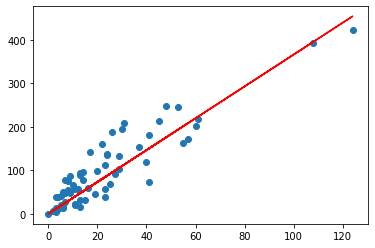

In [3]:
import sys
import pandas as pd
from sklearn.metrics import mean_absolute_error

limit = 10**8
sys.setrecursionlimit(limit)

def StepGradient(m_current, c_current, lr, df):
    #  we want to find where the error is smallest
    c_gradient = 0
    m_gradient = 0
    N = int(len(df))
    
    #  calculation fr the -2/n(derivative w.r.t the slope and w.r.t the intercept)
    for x in range(0, len(df)):
        X_next = df.iloc[x, 0]
        y_next = df.iloc[x, 1]

        # predicted y value
        y_predicted = m_current * X_next

        m_gradient+= (-2)*(X_next * (y_next - y_predicted))/N
        c_gradient+= (-2)*(y_next - y_predicted)/N
    
    # new c value and m value
    new_c = c_current - (lr * c_gradient)
    new_m = m_current - (lr * m_gradient)

    return (round(new_c,2), round(new_m,2))

    
def GDA(df, m, c, lr, times):
    for x in range(times):
        c, m = StepGradient(m, c, lr, df)

    return (m, c)

def run(df):
    

#  hyper_parameter that is learning rate for the gradient descent algorithm
    learning_rate = 0.0001

    # m is the slpoe and c is the intercept
    #  y = mx + c
    m_start = 0
    c_start = 0

    #  iterating number of times
    times = 1000

    per_60 = int(len(df)*(60/100))
    data = df[:per_60]

    slope, intercept = GDA(data, m_start, c_start, learning_rate, times)

    # print(slope, intercept)
    return (slope, intercept)


if __name__ == "__main__":

    df = pd.read_excel('slr06.xls')
    slope,intercept = run(df)

    df = pd.read_excel('slr06.xls')
    #  set X  and  y seperately
    X_data = df[['X']]
    y_data = df['Y']

    # print(X_data)

    # calculating the number of rows for the diving in training, validation,test
    per_60 = int(len(X_data)*(60/100))
    per_val_20= int(len(X_data)*(80/100))
    per_test_20 = int(len(X_data))



    #  training sets 
    X_train = X_data[:per_60]
    y_train = y_data[:per_60]
    print('training settd are')
    print(X_train,y_train)
    
    # validation set
    X_var = X_data[per_60+1:per_val_20]
    y_var = y_data[per_60+1:per_val_20]
    print('validating sets are')
    print(X_var,y_var)

    # test set
    X_test = X_data[per_val_20+1:per_test_20]
    y_test = y_data[per_val_20+1:per_test_20]
    print('test sets are ')
    print(X_test,y_test)



    # cal the predicted y train , validate and the test

    train = [(slope*float(X_train.iloc[i,0]) + intercept) for i in range(len(X_train))]
    val = [(slope*float(X_var.iloc[i,0]) + intercept) for i in range(len(X_var))]
    test = [(slope*float(X_test.iloc[i,0]) + intercept) for i in range(len(X_test))]
    

    print('mean absolute error for the trainging set',mean_absolute_error(train, y_train))
    print('mean absolute error for the validation set',mean_absolute_error(val, y_var))
    print('mean absolute error for the testing set',mean_absolute_error(test, y_test))



#  plotting the graph to check
    import matplotlib.pyplot as plt
    plt.scatter(X_data, y_data)
    plt.plot(X_train,train,color = 'red')
    plt.show()



#Q2.

In [ ]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error

boston_dataset = load_boston(return_X_y=False)
#print(boston_dataset.keys())
#print(boston_dataset.DESCR)
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target # Median value of owner-occupied homes in $1000s ( we have to predict it )
#boston.head(10)
data = boston.to_numpy() #converting DataFrames to numpy array
print("boston data shape (row,column) : ",data.shape)

#dividing data into training set , validation set and test set
sz = data[:,0].size
train_data = data[0:int(sz*0.6),:]
validate_data = data[int(sz*0.6) : int(sz*0.8)   , :]
test_data = data[int(sz*0.8)  : , :]
print("total_data : " ,sz)
print("train_data : " , train_data[:,0].size)
print("validation_data : " ,validate_data[:,0].size)
print("test_data : " ,test_data[:,0].size) 

#======================================================================

# gradientDescent function to calculate optimal theta
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.size  # number of training examples
    for i in range(num_iters):
        y_hat = np.dot(X, theta) # y_predicted (predicted housing price)
        theta = theta - alpha * (1.0/m) * np.dot(X.T, y_hat-y) 
    return theta


# adding column of ones to the data sets for theta0 ( i.e. the first parameter int theta )
n=train_data[:,0].size
import numpy as np
ones=np.ones((n,1))
train_data = np.column_stack((ones,train_data)) # or like -> np.c_[ones, train_data]

n=validate_data[:,0].size
ones=np.ones((n,1))
validate_data = np.column_stack((ones,validate_data))

n=test_data[:,0].size
ones=np.ones((n,1))
test_data = np.column_stack((ones,test_data))



print("=========== GRADIENT DESCENT ALGORITHM STARTS : ==============")
nrow,ncol = data.shape
x = train_data[:,0:ncol]
y = train_data[:,ncol:]
theta = np.zeros((ncol,1))
alpha = 0.000001
iter = 100000
theta = gradientDescent(x,y,theta,alpha,iter)
print("theta from training set : ",theta)
y_predicted = np.dot(x,theta) 
mae = mean_absolute_error(y_predicted , y)

# tuning the hyper-parameter (alpha) using validation data_set
values_of_alpha = [0.000003 , 0.000001, 0.0000003 , 0.00000001 , 0.00000003]
min_mae = mae
res_alpha = alpha
res_theta = theta
x = validate_data[:,0:ncol]
y = validate_data[:,ncol:]

for alpha in values_of_alpha: # finding the best value of alpha which gives minimum value of MAE on validation set
  theta = np.zeros((ncol,1))
  theta = gradientDescent(x,y,theta,alpha,iter)
  y_predicted = np.dot(x,theta) 
  mae = mean_absolute_error(y_predicted , y)
  if mae < min_mae:
    res_alpha = alpha
    res_theta = theta
    min_mae = mae

theta = res_theta
print("theta after tuning alpha from validation set : ",theta)
 

# calculating accuracy on train data 
x = train_data[:,0:ncol]
y = train_data[:,ncol:]

y_predicted = np.dot(x,theta) 
mae = mean_absolute_error(y_predicted , y)
print("MEAN ABSOLUTE ERROR ON TRAINING DATA : ",mae)


# calculating accuracy on validation data 
x = validate_data[:,0:ncol]
y = validate_data[:,ncol:]

y_predicted = np.dot(x,theta) 
mae = mean_absolute_error(y_predicted , y)
print("MEAN ABSOLUTE ERROR ON VALIDATING DATA : ",mae)


# calculating accuracy on test data 
x = test_data[:,0:ncol]
y = test_data[:,ncol:]

y_predicted = np.dot(x,theta) 
mae = mean_absolute_error(y_predicted , y)
print("MEAN ABSOLUTE ERROR ON TEST  DATA : ",mae)


boston data shape (row,column) :  (506, 14)
total_data :  506
train_data :  303
validation_data :  101
test_data :  102
=========== GRADIENT DESCENT ALGORITHM STARTS : ==============
theta from training set :  [[ 0.02277276]
 [ 0.07891455]
 [ 0.06918869]
 [-0.01713093]
 [ 0.02599327]
 [ 0.0184991 ]
 [ 0.44055185]
 [ 0.08587467]
 [-0.15999092]
 [ 0.17182027]
 [-0.00092437]
 [-0.15714102]
 [ 0.07412098]
 [-0.85012851]]
theta after tuning alpha from validation set :  [[ 0.04225091]
 [-0.12855066]
 [ 0.06273439]
 [-0.07674999]
 [ 0.10012007]
 [-0.00796301]
 [ 0.10373847]
 [ 0.08264848]
 [-0.23843666]
 [ 0.18461958]
 [ 0.004664  ]
 [ 0.483971  ]
 [ 0.0399667 ]
 [-1.02870376]]
MEAN ABSOLUTE ERROR ON TRAINING DATA :  6.227073327937616
MEAN ABSOLUTE ERROR ON VALIDATING DATA :  4.592752365421676
MEAN ABSOLUTE ERROR ON TEST  DATA :  6.030333031725009
